In [1]:
import pandas as pd 
import numpy as np 
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle , joblib 

##some nlp lib 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [2]:
##ml -- sklearn 
##dl -- tensorflow
##nlp -- nltk

In [3]:
##reading the data from the file 
x , y = [] , []
##using file handling to read the file 
with open("SMSSpamCollection.txt","r") as file:
    ##reading the file line by line
    data = file.read()
    #iterate thorugh each line
    for data_item in data.split("\n"):
        #checks if the line contains exaclty two elements when splitted
        #by tab character 
        if len(data_item.split("\t")) == 2:
            #append the first element to x and the second element to y
            x.append(data_item.split("\t")[1])
            y.append(data_item.split("\t")[0])
print("Successfully read the data")


Successfully read the data


In [4]:
len(x), len(y)

(5574, 5574)

In [5]:
##dataframe 
data_dict = {"mail_message":x , "label":y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [9]:
# ##text cleaning pre processing and lower casing the characters 
# for i in range(0,len(df)):
#     message = re.sub('[^a-zA-Z]',' ',df.loc[:,"mail_message"][i])
    
#     message = message.lower()
#     df['mail_message'][i] = message
# df.head()
import re

# Function to clean and lowercase text
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    return text.lower()  # Convert to lowercase

# Apply function to entire column
df['mail_message'] = df['mail_message'].astype(str).apply(clean_text)

df.head()


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

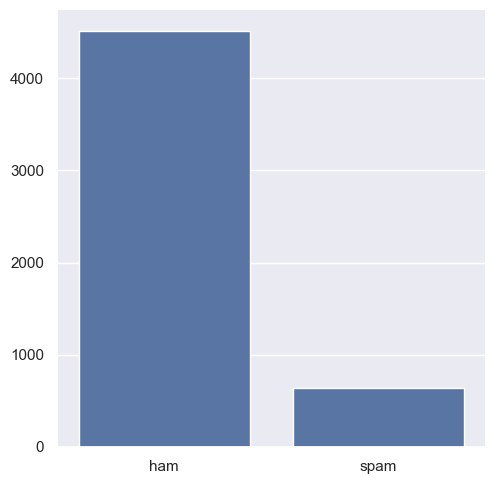

In [11]:
classes = list(df["label"].value_counts().index)
valu = list(df["label"].value_counts().values)
sns.set(rc = {'figure.figsize':(8,20)})
sns.catplot(x=classes,y=valu,kind="bar")
plt.show()

In [12]:
df["label"].value_counts()

label
ham     4515
spam     634
Name: count, dtype: int64

In [13]:
df.sample(2000)

,mail_message,label
492,congrats year special cinema pass for is ...,spam
2961,sir send to group mail check it,ham
36,oops i ll let you know when my roommate s done,ham
3200,no de am seeing in online shop so that i asked,ham
5434,thanx a lot ur help,ham
...,...,...
1171,yeah we can probably swing by once my roommat...,ham
3918,eh ur laptop got no stock lei he say mon mu...,ham
2963,none nowhere ikno doesdiscount shitinnit,ham
5041,natalie f is inviting you to be her frien...,spam


In [14]:
ham = df[df["label"] == "ham"].sample(2000)
spam = df[df["label"] == "spam"]
df = pd.concat([ham,spam])
df["label"].value_counts()

label
ham     2000
spam     634
Name: count, dtype: int64

In [15]:
#lable encoding of our dependent variable 
df["label"] = df["label"].map({"ham":0,"spam":1})
df.head()

,mail_message,label
2765,open rebtel with firefox when it loads just p...,0
3086,in da car park,0
4396,only just got this message not ignoring you ...,0
894,it s ok i noe u re busy but i m really too bor...,0
1147,babe i lost you,0


In [16]:
#splitting the data into x and y 
x = df["mail_message"]
y = df["label"]


In [17]:
#prepare single list of values 
x = x.values

In [18]:
##initializing the bag of words class 
BOW_obj = CountVectorizer(
    max_features=2000,
    stop_words="english"
)
x_transformed = BOW_obj.fit_transform(x)

x_transformed.shape

(2634, 2000)

In [19]:
##sparse to dense matrix conversion 
dense_matrix = x_transformed.toarray()
dense_matrix.shape

(2634, 2000)

In [20]:
##train test split
x_train , x_test , y_train , y_test = train_test_split(
    dense_matrix,
    y,
    test_size=0.2)

In [21]:
##using multinomial naive bayes 
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [22]:
model.score(x_test,y_test)


0.9715370018975332

In [23]:
model.score(x_train,y_train)

0.984812529663028

In [24]:
pred = model.predict(x_test)
pred


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,